#### CRIPS DM

## Bussines Understanding

Kegemukan dan obesitas didefinisikan sebagai akumulasi lemak abnormal atau berlebihan yang menimbulkan risiko bagi kesehatan. Indeks massa tubuh (BMI) lebih dari 25 dianggap kelebihan berat badan, dan lebih dari 30 dianggap obesitas. Masalah ini telah berkembang menjadi epidemi, dengan lebih dari 4 juta orang meninggal setiap tahun akibat kelebihan berat badan atau obesitas pada tahun 2017 menurut beban penyakit global.

Tingkat kelebihan berat badan dan obesitas terus meningkat pada orang dewasa dan anak-anak. Dari tahun 1975 hingga 2016, prevalensi anak dan remaja kelebihan berat badan atau obesitas berusia 5–19 tahun meningkat lebih dari empat kali lipat dari 4% menjadi 18% secara global.

Obesitas adalah salah satu sisi dari beban ganda kekurangan gizi, dan saat ini lebih banyak orang yang mengalami obesitas daripada kekurangan berat badan di setiap wilayah kecuali Afrika sub-Sahara dan Asia. Dulu dianggap sebagai masalah hanya di negara berpenghasilan tinggi, kelebihan berat badan dan obesitas kini meningkat secara dramatis di negara berpenghasilan rendah dan menengah, terutama di perkotaan. Sebagian besar anak yang kelebihan berat badan atau obesitas tinggal di negara berkembang, di mana tingkat peningkatannya lebih dari 30% lebih tinggi daripada negara maju.

DATA SET https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset

## Data Understanding


 Data dikumpulkan dari berbagai sumber, termasuk rekam medis, survei, dan data yang dilaporkan sendiri. Dataset mencakup kolom berikut:

ID: Pengidentifikasi unik untuk setiap individu

Usia: Usia individu

Gender: Jenis kelamin individu

Tinggi: Tinggi individu dalam sentimeter

Berat: Berat individu dalam kilogram

BMI: Indeks massa tubuh individu, dihitung sebagai berat badan dibagi tinggi badan kuadrat

Label: Klasifikasi obesitas individu, 

yang dapat berupa salah satu dari berikut ini:

Berat Normal

Kegemukan

Gendut

Berat badan kurang

In [6]:
import pandas as pd
import numpy as np

# load dataset

In [7]:
df = pd.read_csv('Obesity Classification.csv')
df.sample()

,ID,Age,Gender,Height,Weight,BMI,Label
68,71,15,Male,175,45,18.7,Underweight


In [8]:
df.head(10)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
5,6,50,Female,140,40,16.7,Underweight
6,7,55,Male,200,110,34.2,Obese
7,8,60,Female,130,30,13.3,Underweight
8,9,65,Male,210,120,37.2,Obese
9,10,70,Female,120,20,10.0,Underweight


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [10]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True) 

In [11]:
numerical

['ID', 'Age', 'Height', 'Weight']

In [12]:
catgcols

['Gender', 'BMI', 'Label']

In [13]:
df['Label'].value_counts()

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

In [14]:
df['Label'] = df['Label'].replace(['Underweight'], 'Normal Weight')

In [15]:
df['Label'].value_counts()

Normal Weight    76
Overweight       20
Obese            12
Name: Label, dtype: int64

In [16]:
df['Label'] = df['Label'].replace(['Overweight'], 'Obese')

In [17]:
df['Label'].value_counts()

Normal Weight    76
Obese            32
Name: Label, dtype: int64

In [18]:
ind_col = [col for col in df.columns if col !='Label']
dep_col = 'Label'

In [19]:
df[dep_col].value_counts()

Normal Weight    76
Obese            32
Name: Label, dtype: int64

# transformasi dataset

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [21]:
df['Label'] = le.fit_transform(df['Label'])

In [22]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [23]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,14,0
1,2,30,0,160,60,9,0
2,3,35,1,180,90,17,1
3,4,40,0,150,50,7,0
4,5,45,1,190,100,22,1


In [24]:
df.to_csv('Obesity-Classification.csv', index=False)

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# membuat model decision tree

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=40, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 1.0
akurasi data testing = 1.0 

confusion matrix : 
[[13  0]
 [ 0  9]]

classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



# simulasi model

In [32]:
input_data = (1,25,1,175,80,14)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==1):
    print ('pasien tidak terkena Obesitas')
else:
    print ('pasien terkena Obesitas')

[0]
pasien terkena Obesitas


c:\Users\deden\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# visualisasi pohon keputusan

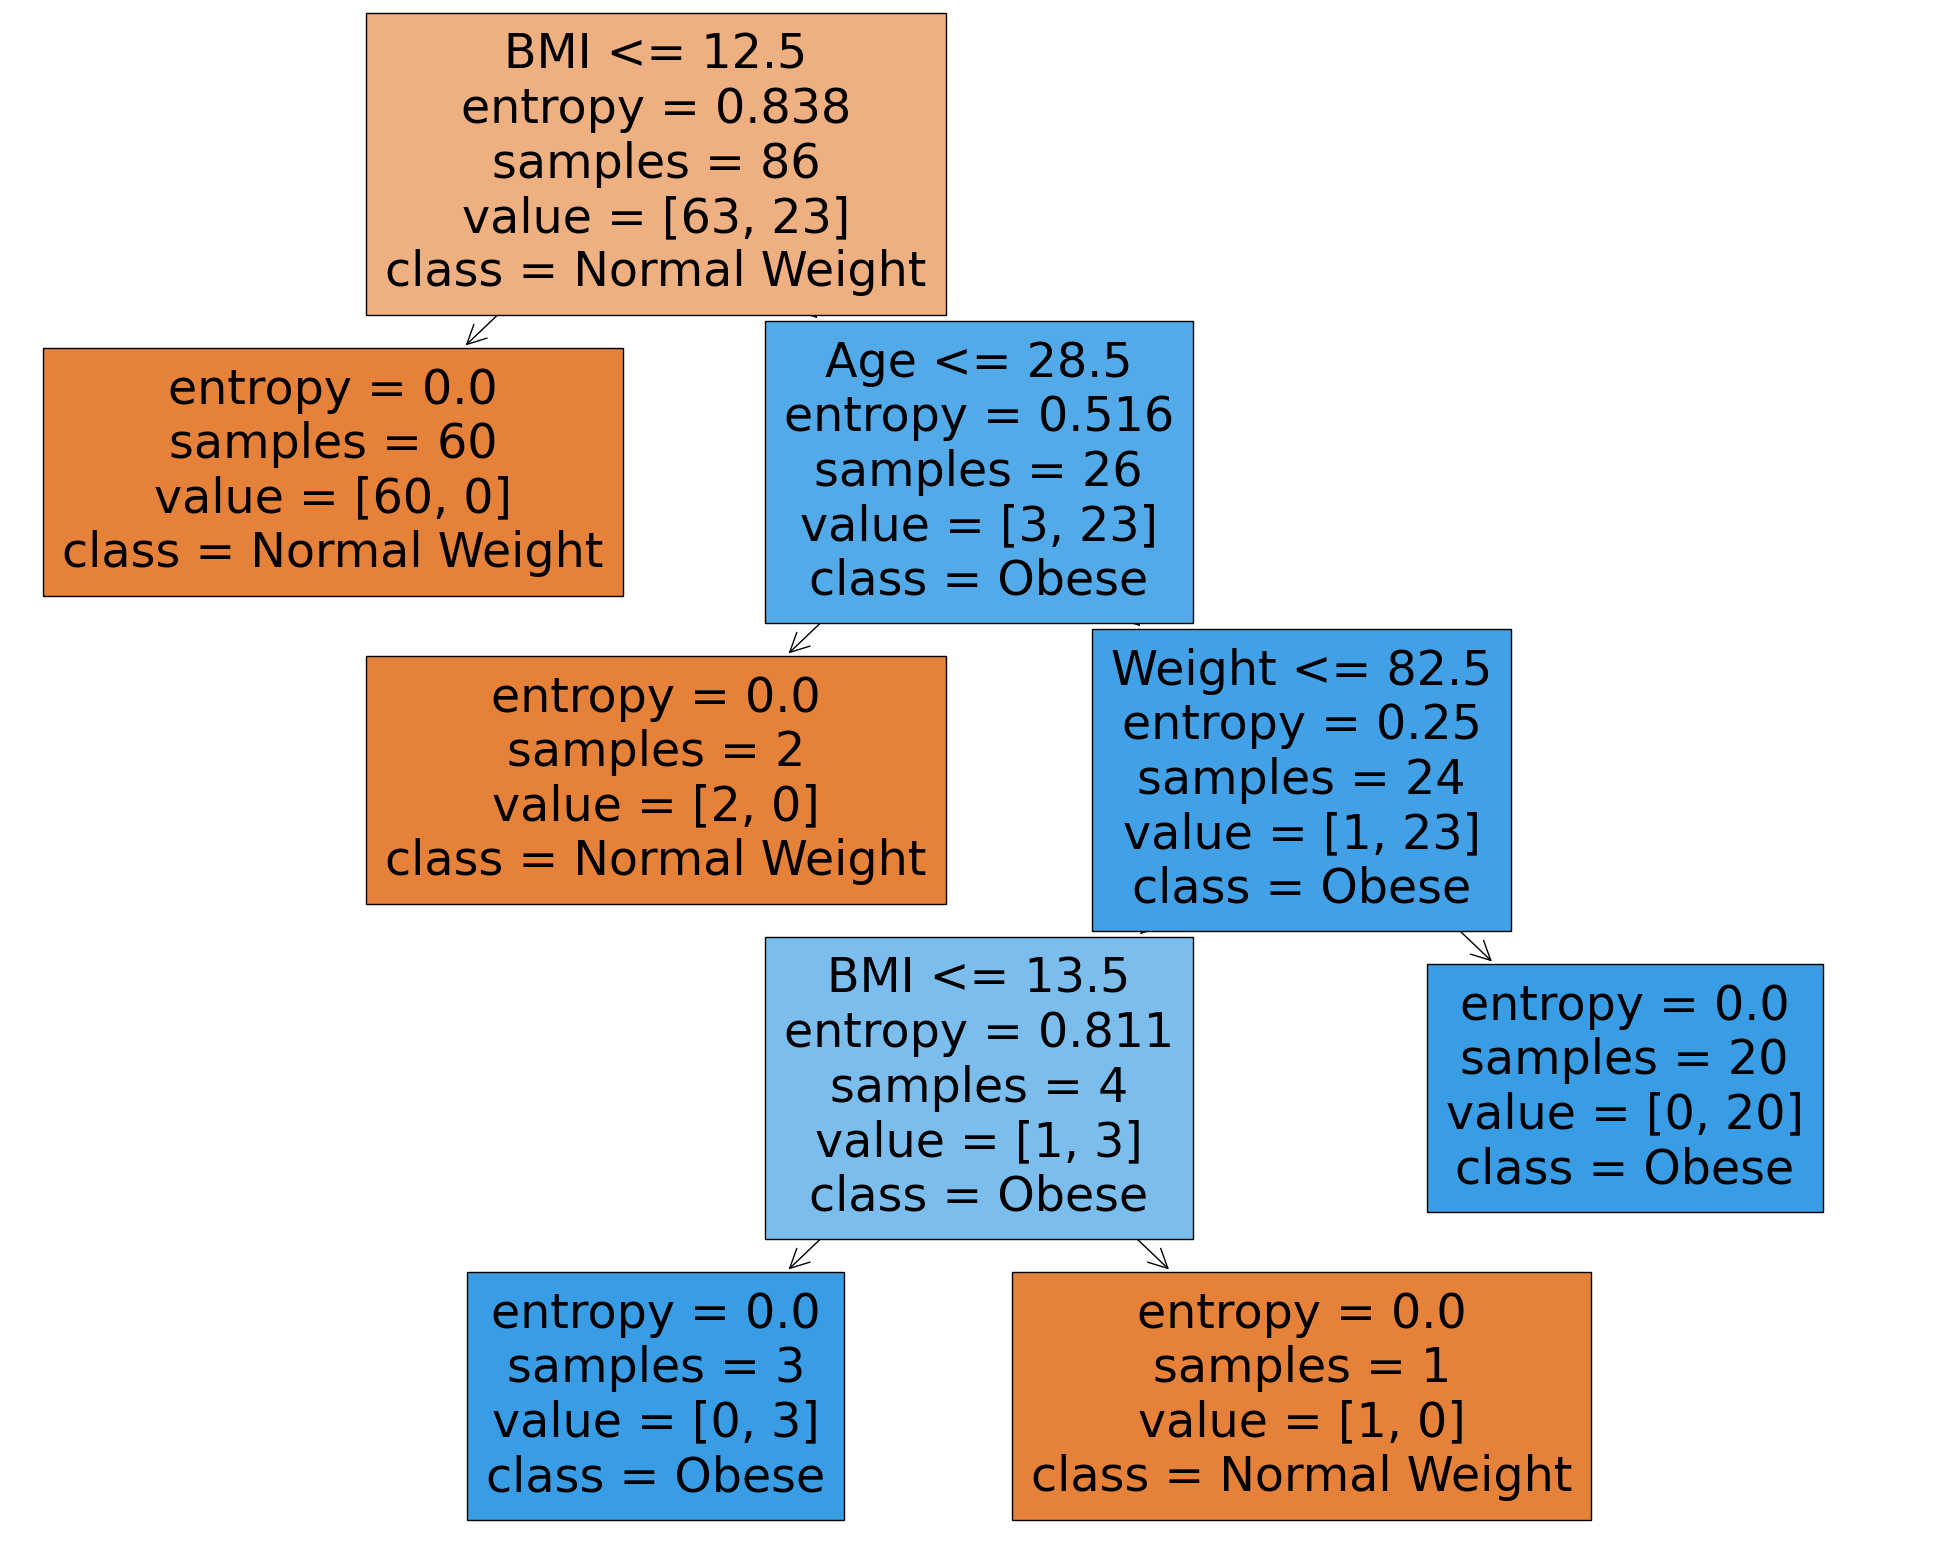

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['Normal Weight', 'Obese'],
                   filled=True)         

In [31]:
import pickle

filename = 'Obesitas.sav'
pickle.dump(model, open(filename, 'wb'))